# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

A) Vamos expressar os dados através da média e diferença utilizando multiplicação matricial.

In [2]:
df_meddif = df.copy()

'''
Forma tradicional usando pandas
``` Python
df_meddif['media'] = df_meddif[['p1','p2']].mean(axis=1)
df_meddif['diferença'] = df_meddif['p2'] - df_meddif['p1']
```
'''


m = np.array([[0.5, 0.5],
              [-1, 1]])
'''
Forma com dot product
``` Python
df_meddif[['média','diferença']] = df_meddif[['p1','p2']].values.dot(m.T)
```
'''


# Forma com matmul do numpy

df_meddif[['media', 'diferença']] = np.matmul(m, df_meddif[['p1', 'p2']].transpose()).transpose()
df_meddif.head()
# Todos as formas geram o mesmo resultado, porem a forma com multiplicação matricial é mais performática e podemos utilizar diferentes veto

,p1,p2,media,diferença
0,6.964692,7.943428,7.454060,0.978736
1,2.861393,5.099537,3.980465,2.238143
2,2.268515,0.974429,1.621472,-1.294085
3,5.513148,4.474359,4.993754,-1.038788
4,7.194690,8.938402,8.066546,1.743712


B) Vamos calcular a correlação entre as variáveis p1 e p2 utilizando.

In [3]:
corr = np.corrcoef(df_meddif['p1'], df_meddif['p2'])
print(f'Correlação entre p1 e p2: {corr[0, 1]:.4f}')

Correlação entre p1 e p2: 0.8957


C) Vamos calcular a correlação entre as variáveis média e diferença.

In [4]:
corr_meddif = np.corrcoef(df_meddif['media'], df_meddif['diferença'])
print(f'Correlação entre média e diferença: {corr_meddif[0, 1]:.4f}')

Correlação entre média e diferença: 0.1335


D) A correlação entre as variáveis p1 e p2 é positiva, indicando que há uma tendência de que alunos que se saem bem em uma prova também se saiam bem na outra. Já a correlação entre as variáveis média e diferença é próxima de zero, sugerindo que essas duas medidas são independentes entre si. Isso significa que a média das notas não está relacionada à diferença entre as notas das duas provas.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [5]:
# Para fazer a soma é só mudarmos a primeira linha da matriz de transformação para [1, 1] que fara uma soma de cada elemento das colunas p1 e p2
# diferente da média que fazia a soma de cada elemento dividido por 2 (0.5 + 0.5)
# Mantendo a segunda linha igual para calcular a diferença entre p2 e p1
# Caso queira apenas a soma, basta usar a matriz [[1, 1]] de uma linha e alterar o código para receber apenas uma coluna de resultado

df_sum = df.copy()
m = np.array([[1, 1],
              [-1, 1]])

df_sum[['soma', 'diferença']] = np.matmul(m, df_sum[['p1', 'p2']].transpose()).transpose()
df_sum.head()

,p1,p2,soma,diferença
0,6.964692,7.943428,14.908120,0.978736
1,2.861393,5.099537,7.960930,2.238143
2,2.268515,0.974429,3.242944,-1.294085
3,5.513148,4.474359,9.987507,-1.038788
4,7.194690,8.938402,16.133092,1.743712


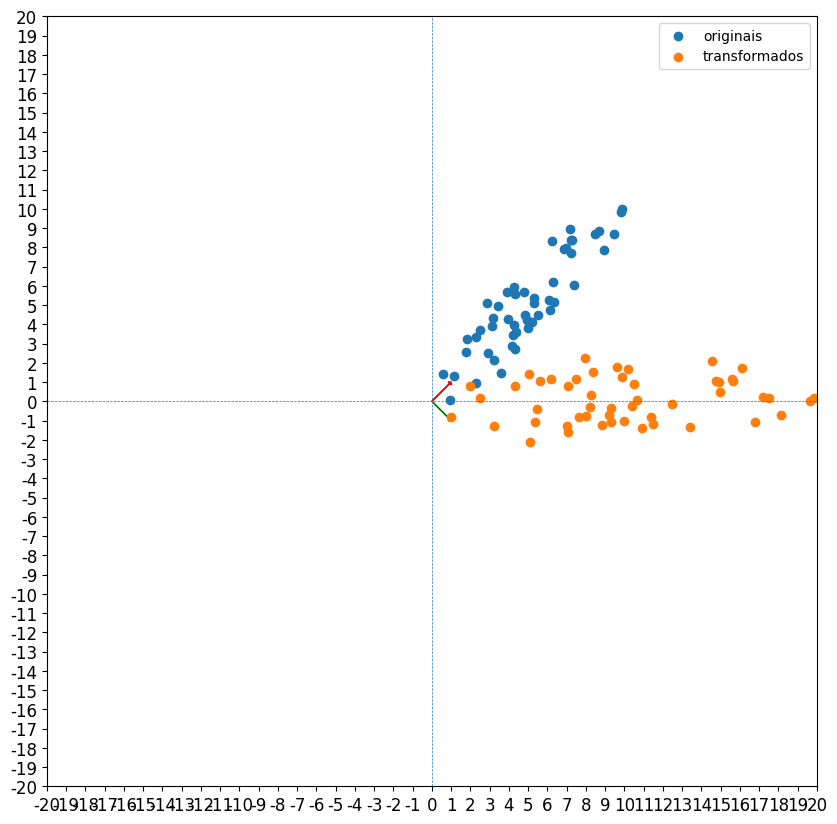

In [6]:
# Plotando os dados originais e transformados
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)

xmin = -20
xmax = 20
ymin = -20
ymax = 20

# ax.axis('equal')
ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

lista_xticks = list(range(int(xmin), int(xmax)+1))
ticksx = ax.set_xticks(lista_xticks)
labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

lista_yticks = list(range(int(ymin), int(ymax)+1))
ticksy = ax.set_yticks(lista_yticks)
labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

# Vetores coluna da matriz de transformação
ax.arrow(0, 0, m[0,0], m[1,0]
         , head_width=0.25
         , head_length=0.1
         , fc='g', ec='g', 
         length_includes_head=True)

ax.arrow(0, 0, m[0,1], m[1,1]
         , head_width=0.25
         , head_length=0.1
         , fc='r', ec='r', 
         length_includes_head=True)


#linhas horizontais e verticais de referência
ax.axvline(0, linewidth=.5, linestyle='--')
ax.axhline(0, linewidth=.5, linestyle='--')


# Plotar os dados originais
plt.scatter(df['p1'], df['p2'], label='originais')

# Plotar os dados transformados
plt.scatter(df_sum['soma'], df_sum['diferença'], label='transformados')


#Legenda
plt.legend()
plt.show()


Observando o gráfico resultante da transformação que utiliza a soma e a diferença das notas das provas p1 e p2, a distribuição dos pontos no gráfico de soma e diferença tende a ser mais dispersa, refletindo a variação total das notas dos alunos. Além disso, a escala dos eixos pode ser diferente, o que pode afetar a percepção visual dos dados. Em geral, a transformação de soma e diferença pode destacar diferentes aspectos da distribuição das notas em comparação com a transformação de média e diferença.